In [51]:
import pandas as pd

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
def bar_chart(feature):
    Survived = train[train["Survived"]==1][feature].value_counts()
    Dead = train[train["Survived"]==0][feature].value_counts()

    df = pd.DataFrame([Survived, Dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10,5))

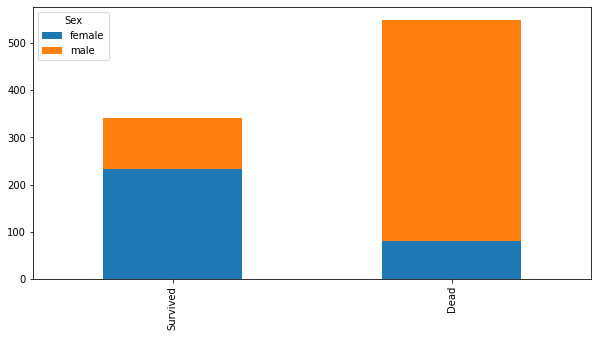

In [56]:
bar_chart('Sex')

# 일단 결측치를 채우거나, str -> numeric으로 바꾸자

In [57]:
# Age를 채우려고하는데, Age는 Miss, Ms와 관련이 있을 것이므로 우선 Name에서 앞 부분을 꺼내오자

train_test_dataset = [train, test]

# 이 부분 기억하기! (안 보고 구현하면서 까먹은 부분)
# 정규표현식 쓰는 법 이해하기
# \ : escape 문자로 \ 뒤에 온 문자가 보이면 끊는다. >> \. 이므로 .이 보이면 끊음
for dataset in train_test_dataset:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


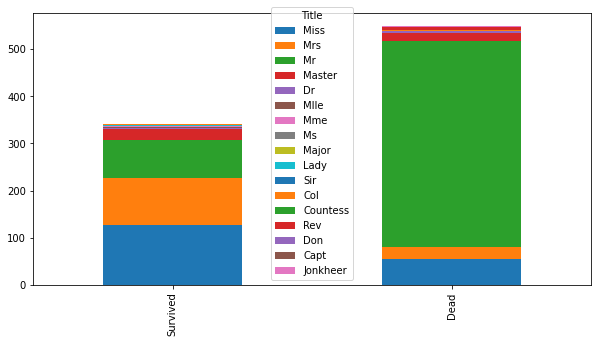

In [58]:
bar_chart("Title")

In [59]:
# Title이 너무 많으니 category를 줄이자. 우선 각각 몇갠지 세보기
train["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [60]:
test["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [61]:
# str -> num으로 매핑
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master" : 3, "Col" : 3, "Dr" : 3, "Rev": 3,
                 "Mlle": 3, "Major": 3, "Countess" : 3, "Capt" : 3, "Ms" : 3, "Sir" : 3,
                 "Lady" : 3, "Mme" : 3, "Don": 3, "Jonkheer" : 3, "Dona" : 3}

for dataset in train_test_dataset:
    dataset["Title"] = dataset["Title"].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [64]:
# Name > Title 매핑했으니 Name 없애기
for dataset in train_test_dataset:
    dataset.drop("Name", axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [65]:
# Sex mapping
sex_mapping = {"male" : 0, "female": 1}
for dataset in train_test_dataset:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [66]:
# Age 결측치 채우기
# 아무래도 Age는 Name과 연관이 많이 됨 (Mr, Miss, Ms) 그러므로 Title을 통해 결측치 채우자

# 이렇게 하는거랑
for dataset in train_test_dataset:
    dataset["Age"] = dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"))

# 이렇게랑 차이가 있나?
# train["Age"] = train["Age"].fillna(train.groupby("Title")["Age"].transform("median"))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [67]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


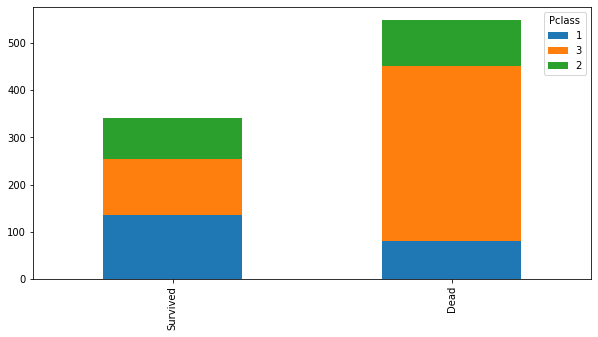

In [68]:
bar_chart("Pclass")

In [69]:
train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [70]:
for dataset in train_test_dataset:
    dataset["Cabin"] = dataset["Cabin"].str[:1] # 앞의 1글자만 가져와서 범주화 편하게 만듦

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: >

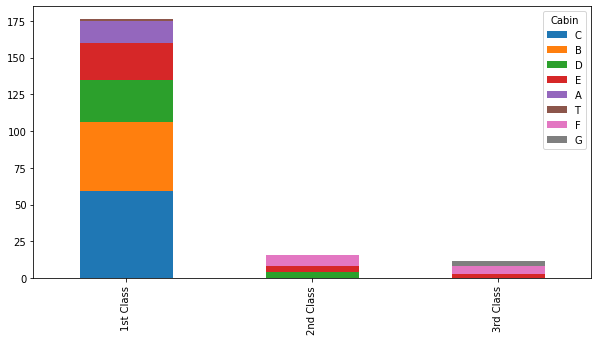

In [71]:
# 일단 총 가족수는 고려하지말고, 바로 Cabin을 채워보자
# 상관관계를 알기위해, Cabin과 Pclass 간의 관계 분석
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st Class", "2nd Class", "3rd Class"]
df.plot(kind="bar", stacked=True, figsize=(10,5))

In [72]:
# 우선 매핑을하자
cabin_mapping = {"A": 0, "B":1, "C":2, "D":3, "E":4, "F":5, "G":6, "T":7}

for dataset in train_test_dataset:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2.0,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2.0,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: >

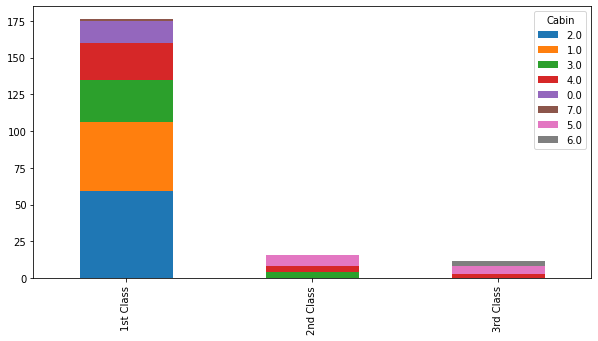

In [73]:
# 이제 Cabin 결측값 채우기 (str vs Nan) 의 상황이라면 우선 숫자화 먼저하고 결측치 채운다.
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st Class", "2nd Class", "3rd Class"]
df.plot(kind="bar", stacked=True, figsize=(10,5))

In [74]:
# 분석결과를 보니 1st class에 0,1,2 Cabin이 다수임 (얘네가 상위 계층인가?)
train["Cabin"] = train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"))
test["Cabin"] = test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"))

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,5.0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2.0,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,5.0,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2.0,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,5.0,S,0


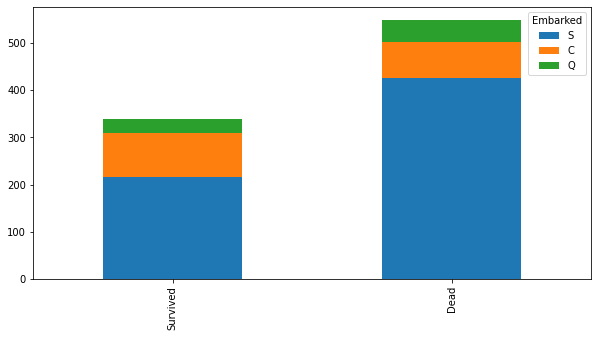

In [76]:
# 이제 남은 결측치는 Embarked 뿐, 얜 누구와 상관관계가 있을까?
# 하나하나 다 찾아볼까?
bar_chart("Embarked") # 우선 S,C,Q 3가지로 구성됨

<Axes: >

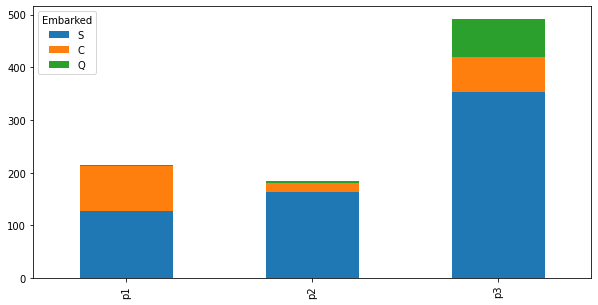

In [77]:
# Embarked vs Pclass
p1 = train[train["Pclass"]==1]["Embarked"].value_counts()
p2 = train[train["Pclass"]==2]["Embarked"].value_counts()
p3 = train[train["Pclass"]==3]["Embarked"].value_counts()

df = pd.DataFrame([p1, p2, p3])
df.index = ["p1", "p2", "p3"]
df.plot(kind="bar", stacked=True, figsize=(10,5)) # 찍어보니 class 상관없이 S 자체에서 많이 탐

In [78]:
# S에서 많이 타니 결측치는 그냥 S로 메꿔도 될 듯

train["Embarked"] = train["Embarked"].fillna("S")
train.info() # 이로써 train은 다 결측치 메꿔짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [79]:
# test 결측치 메꾸기 > Fare가 1개 빔
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.0+ KB


In [80]:
# bar_chart("Fare") # Fare 찍어보니 클래스가 너무 세분화됨 > 좀 범주화할 필요가 있음
train["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [81]:
# Fare 범주화 시키기
for dataset in train_test_dataset:
    dataset.loc[dataset["Fare"] < 7, "Fare"] = 0
    #dataset.loc[(7 <= dataset["Fare"] < 17), "Fare"] = 1 # 이렇게 하면 에러 발생
    dataset.loc[(7 <= dataset["Fare"]) & (dataset["Fare"] < 17), "Fare"] = 1
    dataset.loc[(17 <= dataset["Fare"]) & (dataset["Fare"] < 27), "Fare"] = 2
    dataset.loc[ 27 <= dataset["Fare"], "Fare"] = 3

train["Fare"].value_counts()

Fare
1.0    468
3.0    269
2.0    126
0.0     28
Name: count, dtype: int64

In [82]:
test["Fare"].value_counts()

Fare
1.0    228
3.0    124
2.0     58
0.0      7
Name: count, dtype: int64

<Axes: >

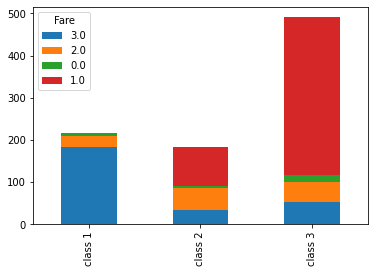

In [83]:
# 아무래도 비용 Fare는 Class와 상관관계가 있지 않을까?
f1 = train[train["Pclass"]==1]["Fare"].value_counts()
f2 = train[train["Pclass"]==2]["Fare"].value_counts()
f3 = train[train["Pclass"]==3]["Fare"].value_counts()

df = pd.DataFrame([f1, f2, f3])
df.index= ["class 1", "class 2", "class 3"]
df.plot(kind="bar", stacked=True) # 그래도 비싼돈준 fare==3이 1st class, 아래로 갈수록 fare==1이 많으므로 상관관계가 있음

In [84]:
# Pclass의 중간값으로 설정
test["Fare"] = test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"))

In [85]:
# 모든 결측치 제거
train.isna().sum(), test.isna().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Title          0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Title          0
 dtype: int64)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,1.0,5.0,S,0
1,2,1,1,1,38.0,1,0,PC 17599,3.0,2.0,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,1.0,5.0,S,1
3,4,1,1,1,35.0,1,0,113803,3.0,2.0,S,2
4,5,0,3,0,35.0,0,0,373450,1.0,5.0,S,0


In [87]:
# Embarked mapping
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_dataset:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,1.0,5.0,0,0
1,2,1,1,1,38.0,1,0,PC 17599,3.0,2.0,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,1.0,5.0,0,1
3,4,1,1,1,35.0,1,0,113803,3.0,2.0,0,2
4,5,0,3,0,35.0,0,0,373450,1.0,5.0,0,0


In [88]:
# 이제 전처리 끝났으니 학습할 준비하기
train.drop(["Ticket", "Title"], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,1.0,5.0,0
1,2,1,1,1,38.0,1,0,3.0,2.0,1
2,3,1,3,1,26.0,0,0,1.0,5.0,0
3,4,1,1,1,35.0,1,0,3.0,2.0,0
4,5,0,3,0,35.0,0,0,1.0,5.0,0


In [89]:
test.drop(["Ticket", "Title"],axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,1.0,5.0,2
1,893,3,1,47.0,1,0,1.0,5.0,0
2,894,2,0,62.0,0,0,1.0,5.0,2
3,895,3,0,27.0,0,0,1.0,5.0,0
4,896,3,1,22.0,1,1,1.0,5.0,0


In [92]:
# 학습을 위한 정답지 (label) 따로빼주기
answer = train["Survived"]
# train data에 정답 빼서 학습에 사용
train.drop("Survived",axis=1, inplace=True)

answer

KeyError: 'Survived'

In [95]:
train.shape, test.shape # feature 일치 시킴

((891, 9), (418, 9))

In [96]:
# 모델 학습
# 여기부분도 잘 숙지하기 import 부분부터
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import numpy as np

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [99]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring="accuracy"
score = cross_val_score(clf, train, answer, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.53333333 0.64044944 0.58426966 0.5505618  0.64044944 0.60674157
 0.59550562 0.62921348 0.57303371 0.47191011]


In [103]:
# np 평균뽑기 숙지하기
# round(value, n) : value 소수 n 번째 까지 출력
round(np.mean(score)*100, 2)

58.25

In [104]:
clf = DecisionTreeClassifier()
scoring="accuracy"
score=cross_val_score(clf, train, answer, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.79775281 0.68539326 0.76404494 0.78651685 0.82022472
 0.74157303 0.73033708 0.7752809  0.7752809 ]


In [105]:
round(np.mean(score)*100, 2)

76.32

In [106]:
clf = RandomForestClassifier(n_estimators=12)
scoring="accuracy"
score = cross_val_score(clf, train, answer, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.83146067 0.82022472 0.83146067 0.83146067 0.85393258
 0.76404494 0.7752809  0.78651685 0.7752809 ]


In [107]:
round(np.mean(score)*100, 2)

80.92

In [108]:
clf = SVC()
score = cross_val_score(clf, train, answer, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [109]:
clf = GaussianNB()
score = cross_val_score(clf, train, answer, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.73033708 0.73033708 0.68539326 0.69662921 0.7752809
 0.71910112 0.78651685 0.84269663 0.79775281]


In [110]:
round(np.mean(score)*100, 2)

75.97

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [113]:
# 괜히 영향 줄것 같은 PassengerId 삭제
train.drop("PassengerId", axis=1, inplace=True)

In [114]:
# test ID는 따로 빼주기 > submission 때를 위함
idx = test["PassengerId"]
test.drop("PassengerId", axis=1, inplace=True)


In [116]:
# 모델 fitting하는 부분 숙지하기!
# 좋았던 분류기 설정
clf = RandomForestClassifier(n_estimators=12)
# 분류기로 fit
clf.fit(train, answer) # 해당 데이터, 정답으로 분류기 가중치 학습

# 학습된 가중치로 예측
prediction = clf.predict(test)


In [117]:
# 예측값으로 submission file 생성
my_submission = pd.DataFrame({
    "PassengerId" : idx,
    "Survived" : prediction,
})

my_submission.to_csv("my_submission.csv", index=False) # index 없애기 (PK)

In [118]:
final = pd.read_csv("my_submission.csv")
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
